# PHASE 2: DATA QUALITY & PREPROCESSING CHECK

## LOAD CSV

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame, specifying latin1 encoding to handle UnicodeDecodeError
df = pd.read_csv('/content/lettuce_dataset.csv', encoding='latin1')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print the DataFrame's information (data types and non-null counts)
print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
   Plant_ID      Date  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023              33.4            53              582   
1         1  8/4/2023              33.5            53              451   
2         1  8/5/2023              33.4            59              678   
3         1  8/6/2023              33.4            68              420   
4         1  8/7/2023              33.4            74              637   

   pH Level  Growth Days  
0       6.4            1  
1       6.1            2  
2       6.4            3  
3       6.4            4  
4       6.5            5  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (°C)  3169 non-null   float

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Handle Missing Values

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Plant_ID            0
Date                0
Temperature (°C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64


## Detect and Handle Outliers



In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns identified:")
print(list(numerical_cols))

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    print(f"\nColumn: {col}")
    print(f"Number of outliers detected: {num_outliers}")

    # Capping outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outliers in {col} have been capped.")

Numerical columns identified:
['Plant_ID', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']

Column: Plant_ID
Number of outliers detected: 0
Outliers in Plant_ID have been capped.

Column: Temperature (°C)
Number of outliers detected: 0
Outliers in Temperature (°C) have been capped.

Column: Humidity (%)
Number of outliers detected: 0
Outliers in Humidity (%) have been capped.

Column: TDS Value (ppm)
Number of outliers detected: 0
Outliers in TDS Value (ppm) have been capped.

Column: pH Level
Number of outliers detected: 0
Outliers in pH Level have been capped.

Column: Growth Days
Number of outliers detected: 0
Outliers in Growth Days have been capped.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Resample Data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

df_resampled = df.resample('W').mean()

print("Resampled DataFrame (Weekly Frequency) - First 5 rows:")
print(df_resampled.head())

print("\nResampled DataFrame Information:")
df_resampled.info()

Resampled DataFrame (Weekly Frequency) - First 5 rows:
            Plant_ID  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
Date                                                                    
2023-08-06      35.5         30.073214     64.685714       602.921429   
2023-08-13      35.5         27.976939     65.795918       599.777551   
2023-08-20      35.5         27.906735     64.526531       598.665306   
2023-08-27      35.5         28.347755     64.818367       602.338776   
2023-09-03      35.5         27.852653     64.306122       599.518367   

            pH Level  Growth Days  
Date                               
2023-08-06  6.383214          2.5  
2023-08-13  6.397551          8.0  
2023-08-20  6.413469         15.0  
2023-08-27  6.398980         22.0  
2023-09-03  6.411837         29.0  

Resampled DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2023-08-06 to 2023-09-24
Freq: W-SUN
Data columns (total 6 columns):
 #   Column   

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Normalize/Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale, excluding 'Plant_ID'
features_to_scale = df_resampled.select_dtypes(include=['float64', 'int64']).columns.drop('Plant_ID')

print(f"Features to be scaled: {list(features_to_scale)}")

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_resampled[features_to_scale] = scaler.fit_transform(df_resampled[features_to_scale])

print("\nDataFrame after standardization - first 5 rows:")
print(df_resampled.head())

print("\nDataFrame after standardization - descriptive statistics:")
print(df_resampled[features_to_scale].describe())

Features to be scaled: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']

DataFrame after standardization - first 5 rows:
            Plant_ID  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
Date                                                                    
2023-08-06      35.5          1.398905      0.228096         0.734319   
2023-08-13      35.5         -0.533154      1.019498         0.364781   
2023-08-20      35.5         -0.597858      0.114623         0.234045   
2023-08-27      35.5         -0.191386      0.322657         0.665833   
2023-09-03      35.5         -0.647703     -0.042493         0.334316   

            pH Level  Growth Days  
Date                               
2023-08-06 -0.087003    -1.503257  
2023-08-13  0.331463    -1.140006  
2023-08-20  0.796095    -0.677686  
2023-08-27  0.373161    -0.215367  
2023-09-03  0.748441     0.246953  

DataFrame after standardization - descriptive statistics:
       Temperature (°C

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Generate Correlation Matrix

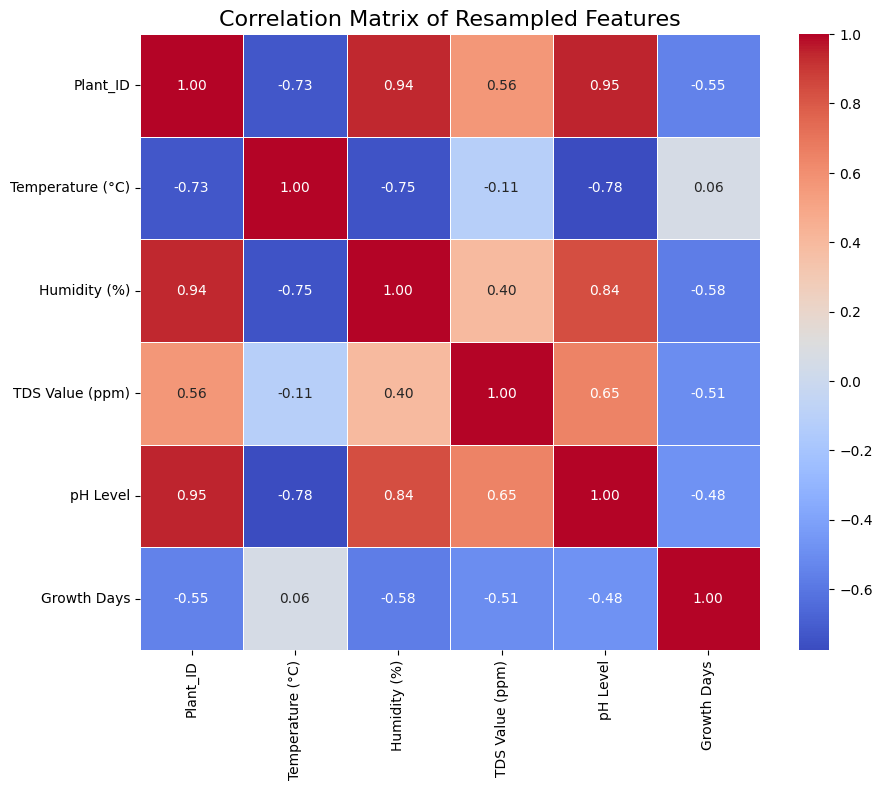

Correlation matrix generated and visualized.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns in df_resampled
correlation_matrix = df_resampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Resampled Features', fontsize=16)

# Display the plot
plt.show()

print("Correlation matrix generated and visualized.")

## Analyze and Visualize Seasonality

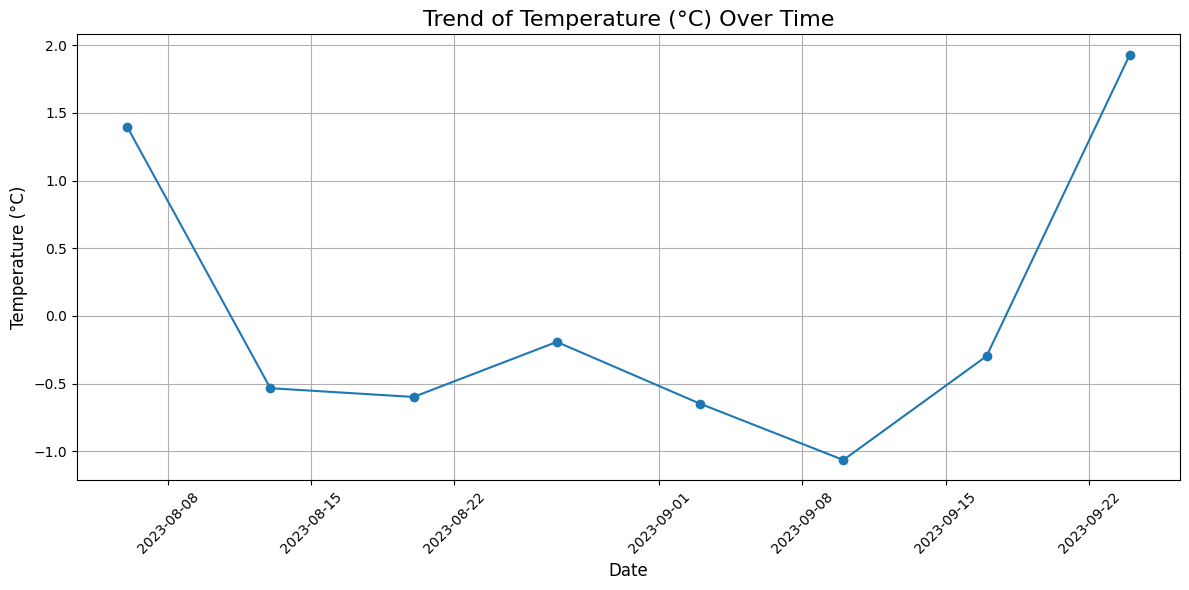

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


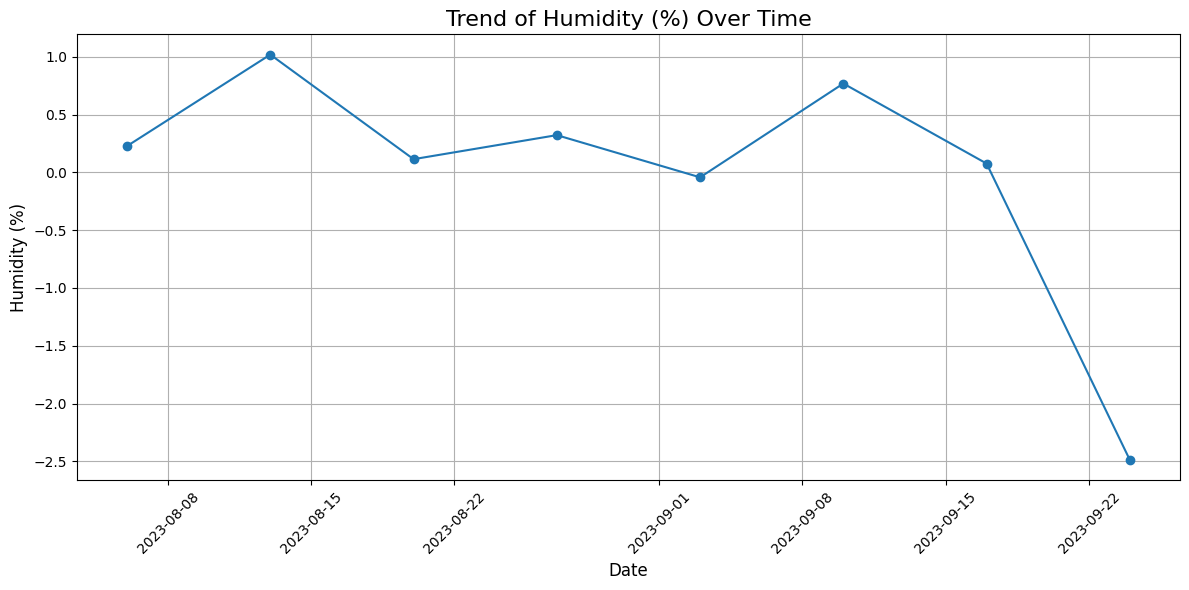

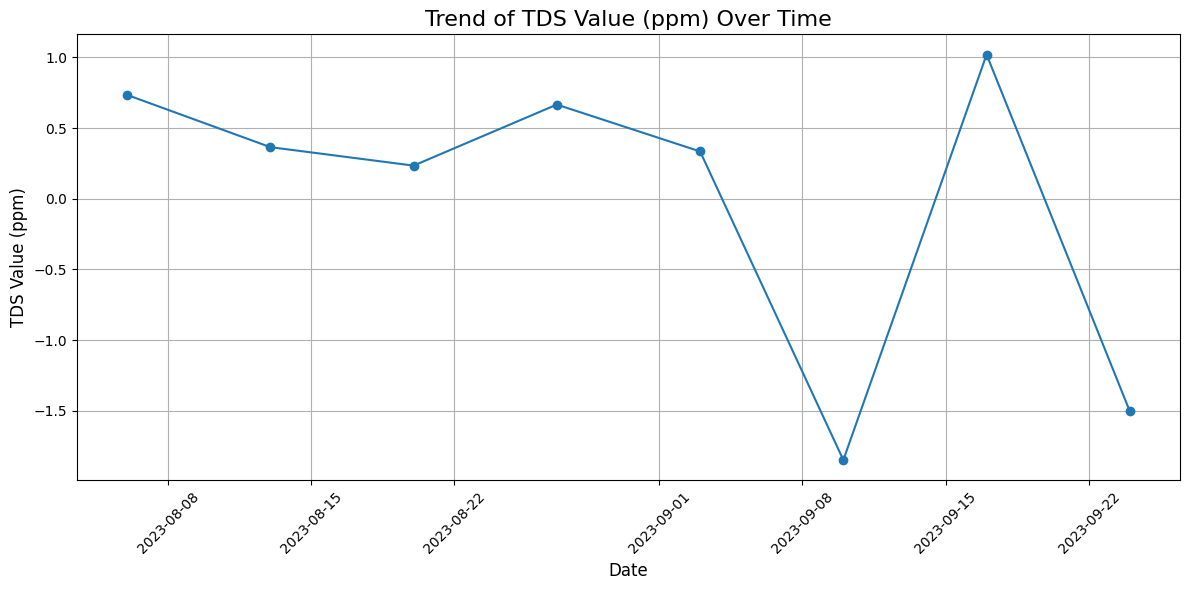

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


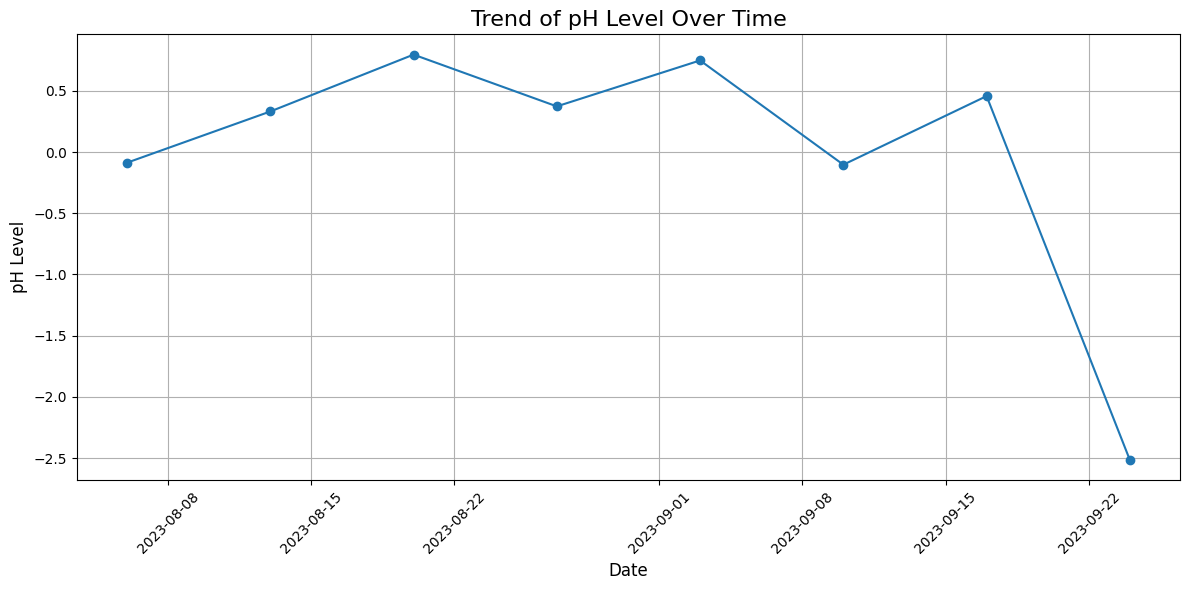

Trends for Temperature (°C), Humidity (%), TDS Value (ppm), and pH Level have been analyzed and visualized.


In [ ]:
import matplotlib.pyplot as plt

# Features to analyze for trends
features_to_analyze = ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']

# Plotting trends for each feature
for feature in features_to_analyze:
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled[feature], marker='o', linestyle='-')
    plt.title(f'Trend of {feature} Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("Trends for Temperature (°C), Humidity (%), TDS Value (ppm), and pH Level have been analyzed and visualized.")

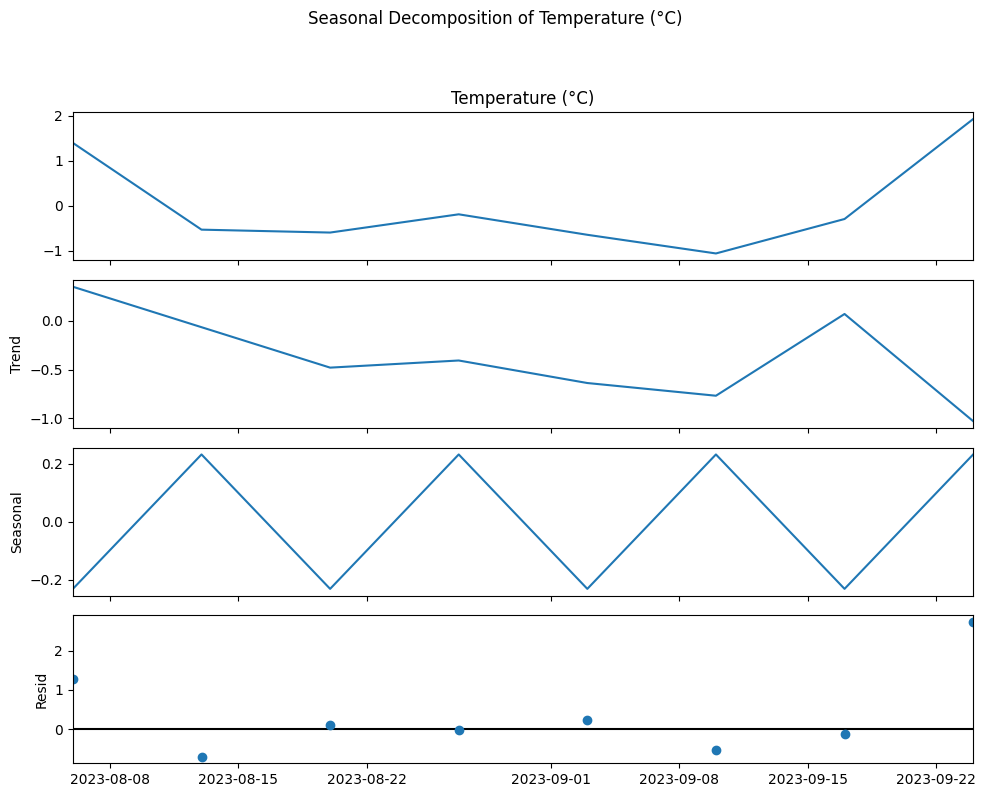

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


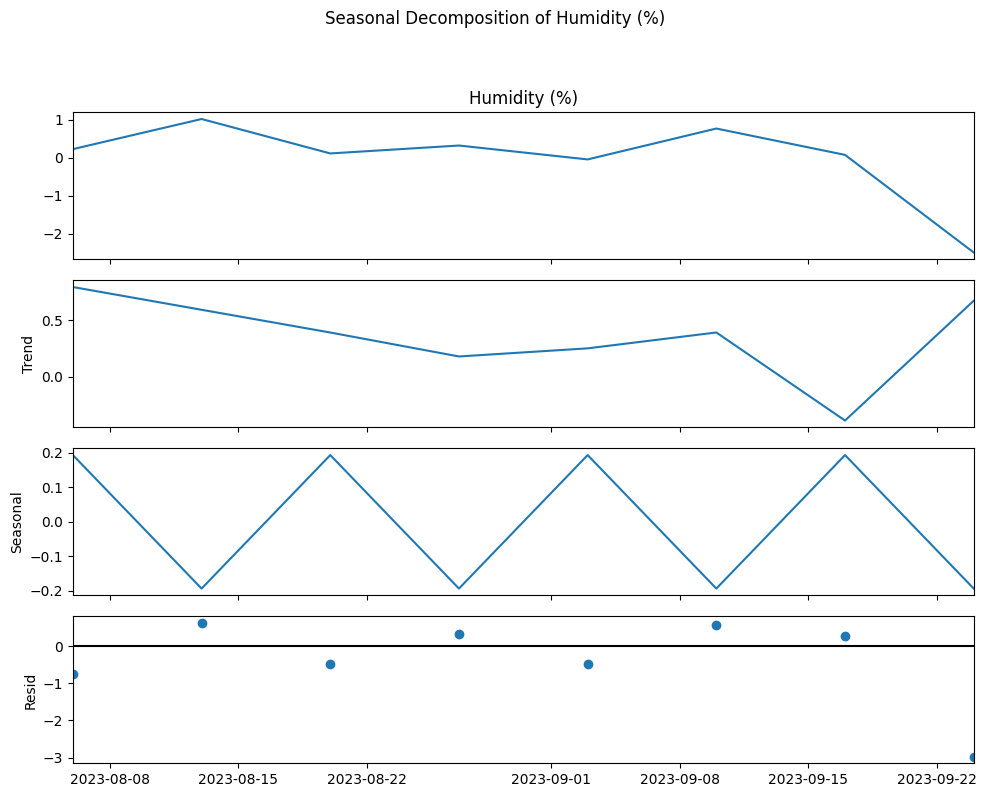

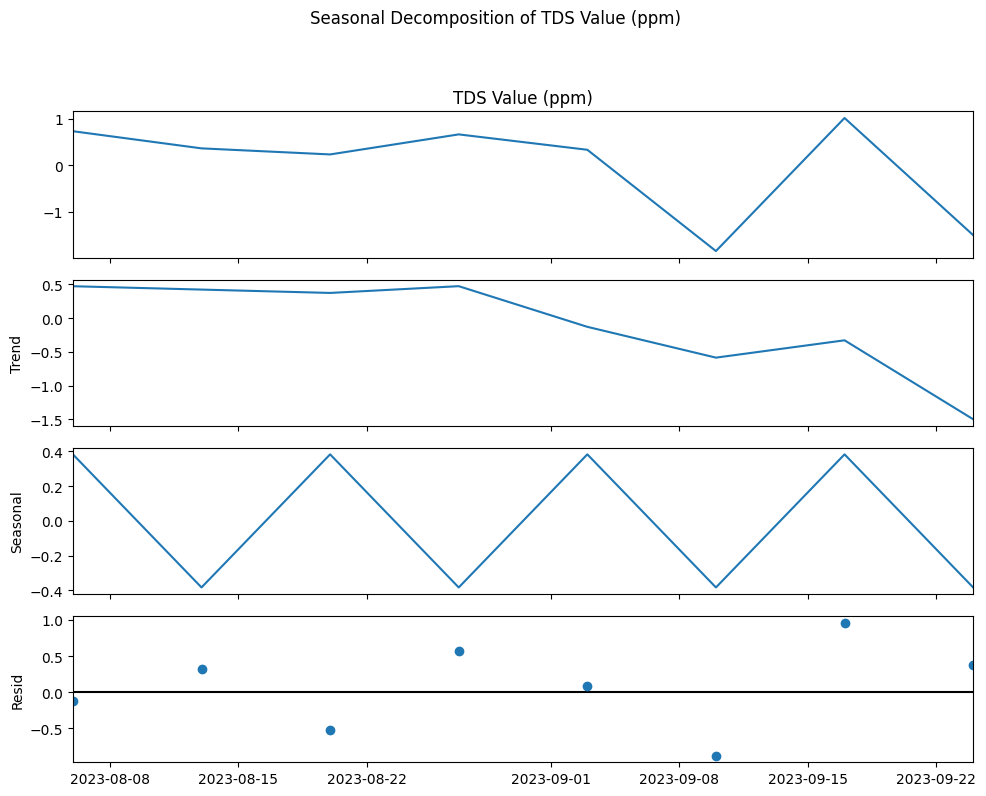

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


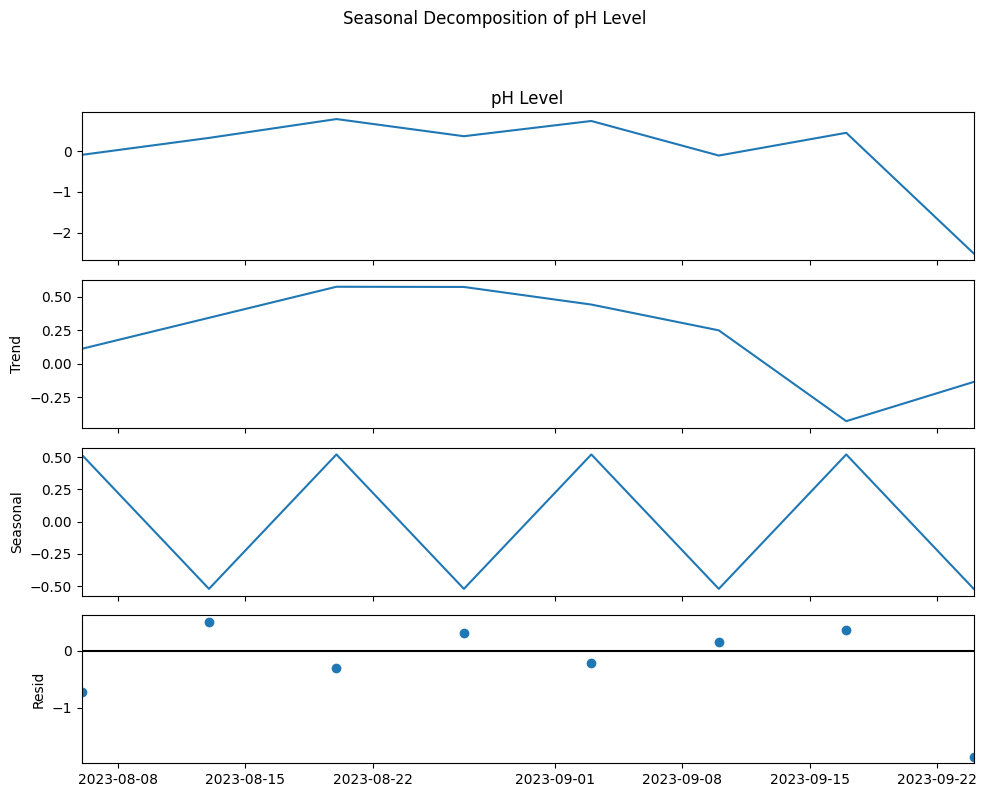

Seasonal patterns for Temperature (°C), Humidity (%), TDS Value (ppm), and pH Level have been analyzed and visualized.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Features to analyze for seasonality
features_to_analyze = ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']

for feature in features_to_analyze:
    try:
        # Perform seasonal decomposition. Period=2 for bi-weekly patterns given weekly data.
        # extrapolate_trend='freq' handles NaN values at the start/end of trend.
        decomposition = seasonal_decompose(df_resampled[feature], model='additive', period=2, extrapolate_trend='freq')

        # Plot the decomposed components
        fig = decomposition.plot()
        fig.set_size_inches(10, 8)
        fig.suptitle(f'Seasonal Decomposition of {feature}', y=1.02) # Adjust suptitle position
        plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
        plt.show()
    except Exception as e:
        print(f"Could not perform seasonal decomposition for {feature} due to: {e}")
        print("This might happen if the time series is too short relative to the specified period.")

print("Seasonal patterns for Temperature (°C), Humidity (%), TDS Value (ppm), and pH Level have been analyzed and visualized.")

## Generate Basic Visual Plots

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:20

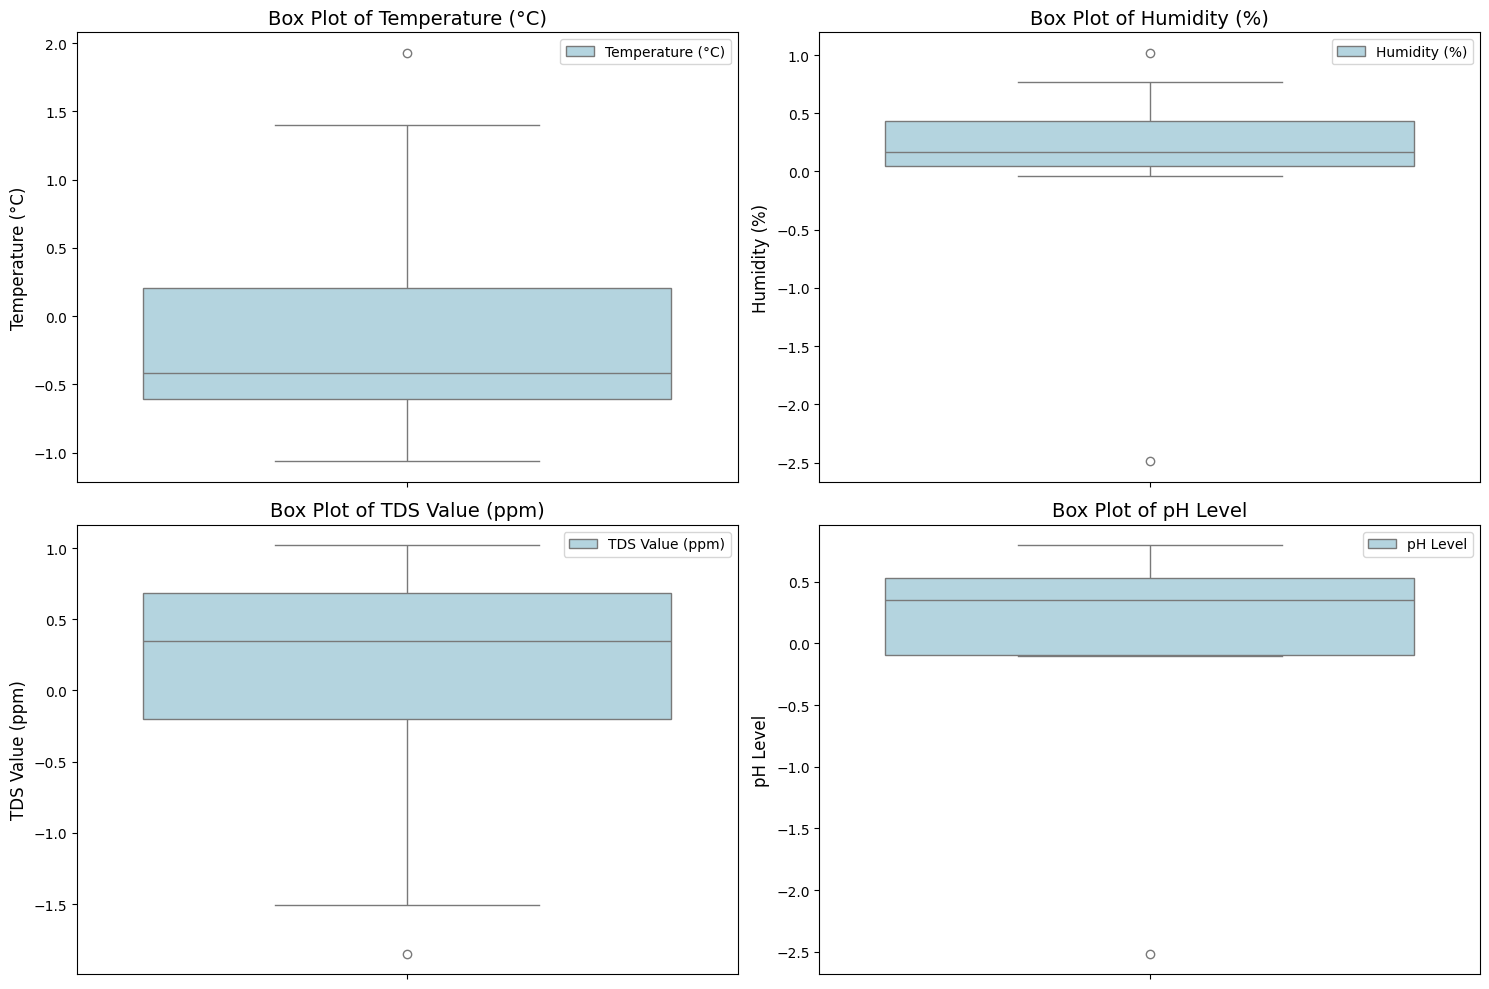

Box plots for 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', and 'pH Level' have been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze for box plots
features_for_boxplots = ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']

# Create a figure with a suitable size for multiple subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

# Generate box plots for each feature
for i, feature in enumerate(features_for_boxplots):
    sns.boxplot(y=df_resampled[feature], ax=axes[i], color='lightblue', label=feature)
    axes[i].set_title(f'Box Plot of {feature}', fontsize=14)
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].legend()

# Ensure proper spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

print("Box plots for 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', and 'pH Level' have been generated.")

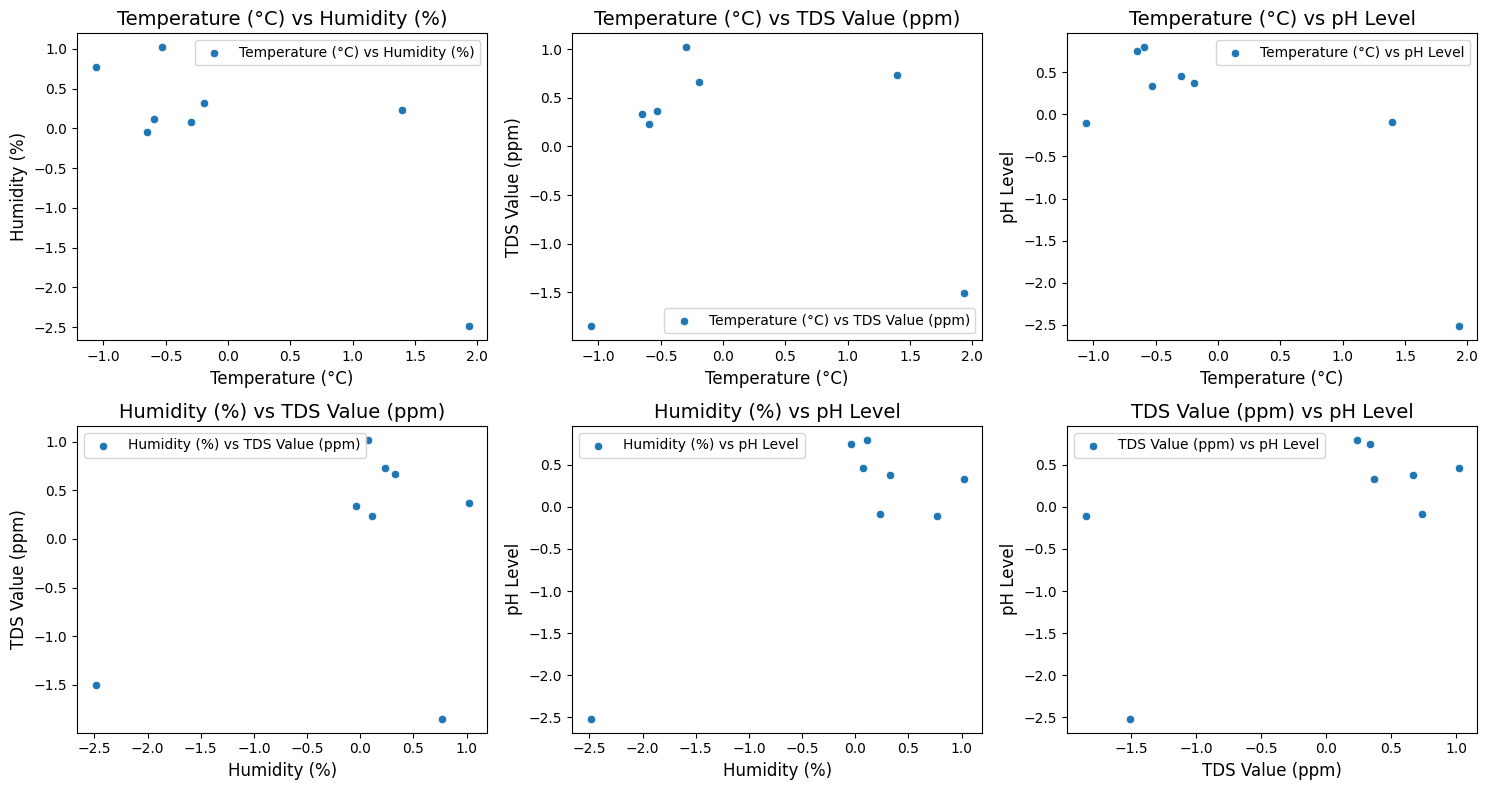

Scatter plots for 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', and 'pH Level' have been generated.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Features to analyze for scatter plots
features_for_scatter = ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']

# Get all unique pairs of features
feature_pairs = list(itertools.combinations(features_for_scatter, 2))

# Calculate the number of rows and columns needed for subplots
num_plots = len(feature_pairs)
num_cols = 3 # You can adjust this for better layout
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a figure with a suitable size for multiple subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# Flatten the axes array for easier iteration, handling single row/col case
if num_plots == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Generate scatter plots for each feature pair
for i, (feature1, feature2) in enumerate(feature_pairs):
    sns.scatterplot(x=df_resampled[feature1], y=df_resampled[feature2], ax=axes[i], label=f'{feature1} vs {feature2}')
    axes[i].set_title(f'{feature1} vs {feature2}', fontsize=14)
    axes[i].set_xlabel(feature1, fontsize=12)
    axes[i].set_ylabel(feature2, fontsize=12)
    axes[i].legend()

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ensure proper spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

print("Scatter plots for 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', and 'pH Level' have been generated.")

## Normalize/Standardize Daily Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Create a copy of the original DataFrame df and store it in a new DataFrame called df_daily_scaled
df_daily_scaled = df.copy()

# The 'Date' column is already the index in df due to prior processing, so no need to convert and set again.
# If 'Date' were still a column, the following lines would be needed:
# df_daily_scaled['Date'] = pd.to_datetime(df_daily_scaled['Date'], format='%m/%d/%Y')
# df_daily_scaled.set_index('Date', inplace=True)

# 3. Identify the columns to be scaled
# Exclude 'Plant_ID' as it's an identifier, not a feature to be scaled in this context.
features_to_scale_daily = ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']

print(f"Features to be scaled in df_daily_scaled: {list(features_to_scale_daily)}")

# 5. Instantiate StandardScaler
scaler_daily = StandardScaler()

# 6. Apply the fit_transform method to the identified columns in df_daily_scaled
df_daily_scaled[features_to_scale_daily] = scaler_daily.fit_transform(df_daily_scaled[features_to_scale_daily])

# 7. Print the first 5 rows of df_daily_scaled and its descriptive statistics for the scaled columns
print("\nDataFrame after daily standardization - first 5 rows:")
print(df_daily_scaled.head())

print("\nDataFrame after daily standardization - descriptive statistics for scaled columns:")
print(df_daily_scaled[features_to_scale_daily].describe())

Features to be scaled in df_daily_scaled: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']

DataFrame after daily standardization - first 5 rows:
            Plant_ID  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
Date                                                                    
2023-08-03         1          1.125915     -1.321099        -0.138688   
2023-08-04         1          1.147329     -1.321099        -1.270977   
2023-08-05         1          1.125915     -0.653510         0.691082   
2023-08-06         1          1.125915      0.347874        -1.538924   
2023-08-07         1          1.125915      1.015463         0.336701   

            pH Level  Growth Days  
Date                               
2023-08-03  0.003366    -1.693530  
2023-08-04 -1.276599    -1.617038  
2023-08-05  0.003366    -1.540547  
2023-08-06  0.003366    -1.464055  
2023-08-07  0.430021    -1.387564  

DataFrame after daily standardization - descriptive sta

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# PHASE 3 - MODEL DEVELOPMENT & EXPERIMENTATION CHECK

## Prepare Daily Data for Machine Learning

In [ ]:
import pandas as pd

# 1. Define the feature matrix X and the target vector y
X = df_daily_scaled[['Temperature (°C)', 'Humidity (%)']]
y = df_daily_scaled['Growth Days']

# 2. Determine the split point for an 80/20 chronological split
split_point = int(len(df_daily_scaled) * 0.8)

# 3. Split X and y into training and testing sets
X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

# 4. Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("Daily data split into training and testing sets successfully.")

Shape of X_train: (2535, 2)
Shape of X_test: (634, 2)
Shape of y_train: (2535,)
Shape of y_test: (634,)
Daily data split into training and testing sets successfully.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Train and Evaluate Decision Tree Regressor (Daily Data)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, dt_predictions)
mse = mean_squared_error(y_test, dt_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_predictions)

# Store metrics in a dictionary
dt_metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}

# Print the calculated metrics
print("Decision Tree Regressor Performance:")
for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nDecision Tree Regressor model trained, predictions made, and performance evaluated.")

Decision Tree Regressor Performance:
MAE: 1.1795
MSE: 2.0645
RMSE: 1.4368
R2: -1.0669

Decision Tree Regressor model trained, predictions made, and performance evaluated.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Train and Evaluate Random Forest Regressor (Daily Data)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_predictions)

# Store metrics in a dictionary
rf_metrics = {
    'MAE': mae_rf,
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'R2': r2_rf
}

# Print the calculated metrics
print("Random Forest Regressor Performance:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nRandom Forest Regressor model trained, predictions made, and performance evaluated.")

Random Forest Regressor Performance:
MAE: 0.9742
MSE: 1.3247
RMSE: 1.1510
R2: -0.3263

Random Forest Regressor model trained, predictions made, and performance evaluated.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Train and Evaluate XGBoost Regressor (Daily Data)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
mse_xgb = mean_squared_error(y_test, xgb_predictions)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_predictions)

# Store metrics in a dictionary
xgb_metrics = {
    'MAE': mae_xgb,
    'MSE': mse_xgb,
    'RMSE': rmse_xgb,
    'R2': r2_xgb
}

# Print the calculated metrics
print("XGBoost Regressor Performance:")
for metric, value in xgb_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nXGBoost Regressor model trained, predictions made, and performance evaluated.")

XGBoost Regressor Performance:
MAE: 1.0296
MSE: 1.5170
RMSE: 1.2317
R2: -0.5188

XGBoost Regressor model trained, predictions made, and performance evaluated.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Train and Evaluate SARIMA Model (Daily Data)

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Aggregate df_daily_scaled to have a unique daily index by taking the mean
df_aggregated_daily = df_daily_scaled.groupby(df_daily_scaled.index).mean()

# Explicitly set the frequency of the index to daily ('D')
# This should now work correctly as each date is unique after aggregation.
df_aggregated_daily.index.freq = 'D'

# Redefine features and target from the aggregated daily data
X_agg = df_aggregated_daily[['Temperature (°C)', 'Humidity (%)']]
y_agg = df_aggregated_daily['Growth Days']

# Determine the split point for an 80/20 chronological split on the aggregated data
split_point_agg = int(len(df_aggregated_daily) * 0.8)

# Split X_agg and y_agg into training and testing sets
X_train_sarimax_agg = X_agg.iloc[:split_point_agg]
X_test_sarimax_agg = X_agg.iloc[split_point_agg:]
y_train_sarimax_agg = y_agg.iloc[:split_point_agg]
y_test_sarimax_agg = y_agg.iloc[split_point_agg:]

# Initialize the SARIMAX model with the aggregated data
sarima_model_agg = SARIMAX(endog=y_train_sarimax_agg,
                           exog=X_train_sarimax_agg,
                           order=(1, 1, 1),
                           seasonal_order=(0, 0, 0, 0))

# Fit the SARIMAX model
sarima_results_agg = sarima_model_agg.fit(disp=False) # disp=False to suppress convergence messages

# Generate predictions for the test set
sarima_predictions_agg = sarima_results_agg.get_forecast(steps=len(y_test_sarimax_agg), exog=X_test_sarimax_agg)
predictions_mean_agg = sarima_predictions_agg.predicted_mean

# Align predictions with y_test_sarimax_agg index
predictions_mean_agg.index = y_test_sarimax_agg.index

# Calculate evaluation metrics
mae_sarima_agg = mean_absolute_error(y_test_sarimax_agg, predictions_mean_agg)
mse_sarima_agg = mean_squared_error(y_test_sarimax_agg, predictions_mean_agg)
rmse_sarima_agg = np.sqrt(mse_sarima_agg)
r2_sarima_agg = r2_score(y_test_sarimax_agg, predictions_mean_agg)

# Store metrics in a dictionary
sarima_metrics_agg = {
    'MAE': mae_sarima_agg,
    'MSE': mse_sarima_agg,
    'RMSE': rmse_sarima_agg,
    'R2': r2_sarima_agg
}

# Print the calculated metrics
print("SARIMAX Model Performance (with aggregated daily data):")
for metric, value in sarima_metrics_agg.items():
    print(f"{metric}: {value:.4f}")

print("\nSARIMAX model trained, predictions made, and performance evaluated with aggregated daily data.")

SARIMAX Model Performance (with aggregated daily data):
MAE: 0.0048
MSE: 0.0001
RMSE: 0.0082
R2: 0.9985

SARIMAX model trained, predictions made, and performance evaluated with aggregated daily data.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Train and Evaluate Vector Autoregression (VAR) Model (Daily Data)

In [ ]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Create a training DataFrame for the VAR model
train_data_var = pd.concat([y_train_sarimax_agg, X_train_sarimax_agg], axis=1)

# 2. Create a testing DataFrame for the VAR model
test_data_var = pd.concat([y_test_sarimax_agg, X_test_sarimax_agg], axis=1)

# 3. Initialize the VAR model with train_data_var
model = VAR(train_data_var)

# 4. Select the optimal lag order for the VAR model using BIC criterion
# maxlags is set to a reasonable number relative to the data length
lag_order_results = model.select_order(maxlags=7)
lag_order = lag_order_results.bic # Using BIC to select the optimal lag order
print(f"Optimal lag order selected by BIC: {lag_order}")

# 5. Fit the VAR model to train_data_var using the selected lag order
model_fitted = model.fit(lag_order)

# 6. Generate forecasts for the test set
# The forecast method requires the last 'lag_order' observations from the training data.
# We need to provide the last 'lag_order' rows of the training data as 'y_initial' or 'start'
# for the forecast method to generate predictions for 'steps' many future periods.

# Get the lag_order most recent observations from the training data
# This serves as the initial values for forecasting
last_train_values = train_data_var.values[-lag_order:]

# Forecast for the length of the test set
forecast = model_fitted.forecast(y=last_train_values, steps=len(test_data_var))

# The forecast result is an array where each column corresponds to a variable in the order they appeared in train_data_var
# We need the predictions for 'Growth Days', which is the first column
var_predictions_growth_days = forecast[:, train_data_var.columns.get_loc('Growth Days')]

# Align predictions with y_test_sarimax_agg index for evaluation
# Convert to pandas Series with the correct index
var_predictions_series = pd.Series(var_predictions_growth_days, index=y_test_sarimax_agg.index)

# 7. Calculate evaluation metrics
mae_var = mean_absolute_error(y_test_sarimax_agg, var_predictions_series)
mse_var = mean_squared_error(y_test_sarimax_agg, var_predictions_series)
rmse_var = np.sqrt(mse_var)
r2_var = r2_score(y_test_sarimax_agg, var_predictions_series)

# 8. Store metrics in a dictionary
var_metrics = {
    'MAE': mae_var,
    'MSE': mse_var,
    'RMSE': rmse_var,
    'R2': r2_var
}

# 9. Print the calculated metrics
print("\nVAR Model Performance:")
for metric, value in var_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nVAR model trained, predictions made, and performance evaluated.")

Optimal lag order selected by BIC: 3

VAR Model Performance:
MAE: 0.0058
MSE: 0.0002
RMSE: 0.0129
R2: 0.9963

VAR model trained, predictions made, and performance evaluated.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Train and Evaluate Holt-Winters (Daily Data)


In [ ]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize the Holt-Winters model using only the 'Growth Days' time series from the aggregated daily training data
# y_train_sarimax_agg is already defined and represents the 'Growth Days' training data from df_aggregated_daily
holt_model = Holt(y_train_sarimax_agg)

# 2. Fit the Holt-Winters model to the training data
holt_fit = holt_model.fit()

# 3. Generate predictions for the length of y_test_sarimax_agg
# We need to forecast for the number of steps equal to the length of the test set.
holt_predictions = holt_fit.forecast(steps=len(y_test_sarimax_agg))

# 4. Align the predictions with the index of y_test_sarimax_agg
holt_predictions.index = y_test_sarimax_agg.index

# 5. Calculate evaluation metrics
mae_holt = mean_absolute_error(y_test_sarimax_agg, holt_predictions)
mse_holt = mean_squared_error(y_test_sarimax_agg, holt_predictions)
rmse_holt = np.sqrt(mse_holt)
r2_holt = r2_score(y_test_sarimax_agg, holt_predictions)

# 6. Store metrics in a dictionary
holt_winters_metrics = {
    'MAE': mae_holt,
    'MSE': mse_holt,
    'RMSE': rmse_holt,
    'R2': r2_holt
}

# 7. Print the calculated metrics
print("Holt-Winters Model Performance (with aggregated daily data):")
for metric, value in holt_winters_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nHolt-Winters model trained, predictions made, and performance evaluated.")

Holt-Winters Model Performance (with aggregated daily data):
MAE: 0.0058
MSE: 0.0002
RMSE: 0.0129
R2: 0.9963

Holt-Winters model trained, predictions made, and performance evaluated.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Compare Model Performance (Daily Data)


In [ ]:
import pandas as pd

# 1. Create a dictionary named all_metrics to store the performance metrics
all_metrics = {
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'SARIMA': sarima_metrics_agg, # Using aggregated SARIMA metrics
    'VAR': var_metrics,
    'Holt-Winters': holt_winters_metrics
}

# 2. Convert the all_metrics dictionary into a pandas DataFrame named metrics_df
metrics_df = pd.DataFrame(all_metrics).T # .T transposes the DataFrame for better readability

# 3. Print the metrics_df to display the comparison of all model performances
print("\nComparison of Model Performance (Daily Data):")
print(metrics_df)

# 4. Identify and print the model with the best (lowest) RMSE
best_rmse_model = metrics_df['RMSE'].idxmin()
min_rmse = metrics_df['RMSE'].min()
print(f"\nModel with the best (lowest) RMSE: {best_rmse_model} (RMSE: {min_rmse:.4f})")

# Identify and print the model with the best (highest) R2 score
best_r2_model = metrics_df['R2'].idxmax()
max_r2 = metrics_df['R2'].max()
print(f"Model with the best (highest) R2: {best_r2_model} (R2: {max_r2:.4f})")



Comparison of Model Performance (Daily Data):
                    MAE       MSE      RMSE        R2
Decision Tree  1.179465  2.064475  1.436828 -1.066917
Random Forest  0.974222  1.324717  1.150964 -0.326284
XGBoost        1.029601  1.516984  1.231659 -0.518778
SARIMA         0.004823  0.000067  0.008201  0.998500
VAR            0.005795  0.000167  0.012937  0.996266
Holt-Winters   0.005795  0.000167  0.012937  0.996266

Model with the best (lowest) RMSE: SARIMA (RMSE: 0.0082)
Model with the best (highest) R2: SARIMA (R2: 0.9985)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Visualize All Model Predictions (Daily Data)

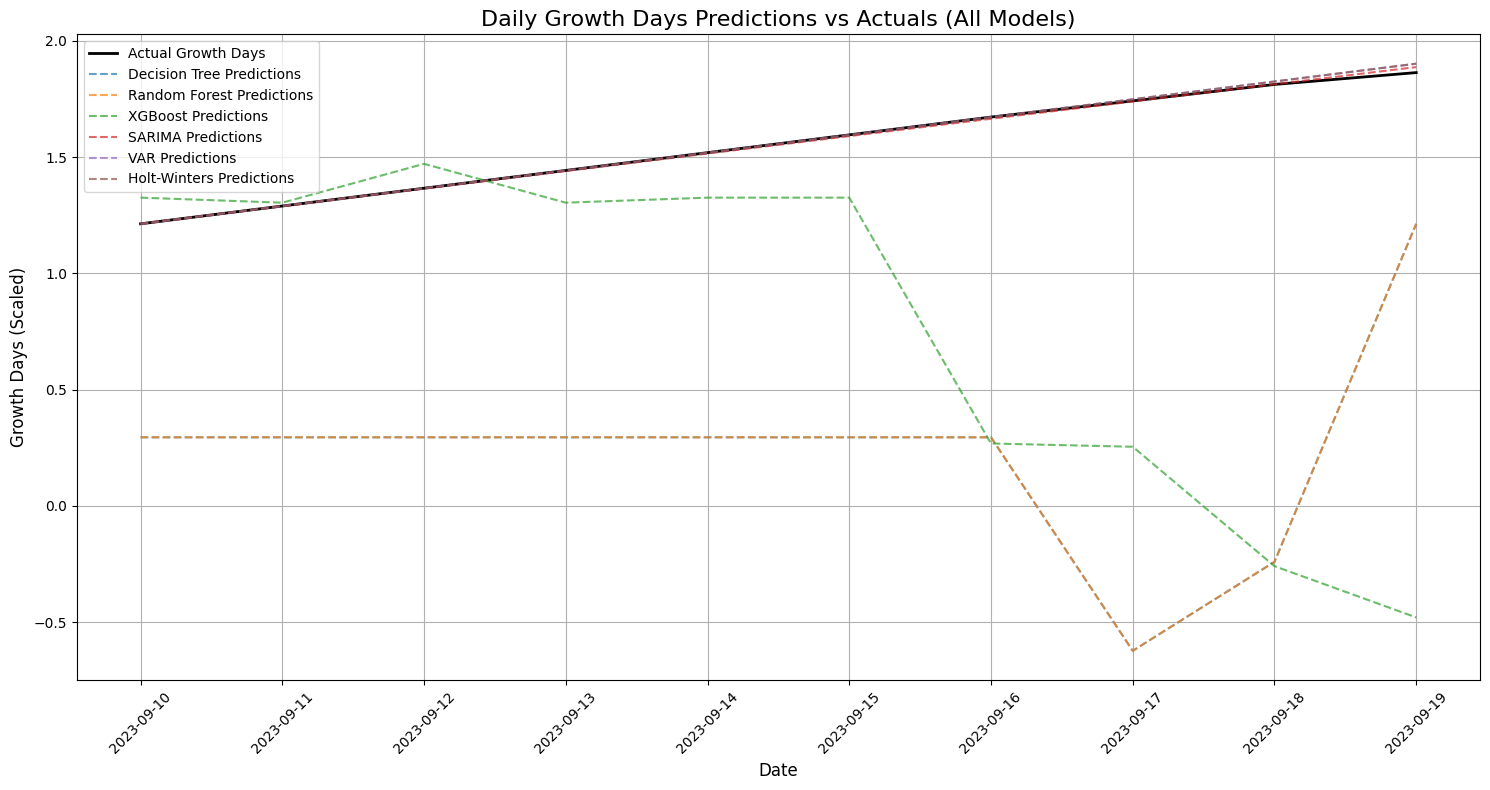

Visualized all model predictions against actual daily data.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure X_test_sarimax_agg is used for consistency with SARIMA, VAR, Holt-Winters
# X_test_sarimax_agg represents the exogenous variables for the test period from the aggregated daily data.

# 2. Use the trained dt_model to predict on X_test_sarimax_agg
dt_predictions_agg = dt_model.predict(X_test_sarimax_agg)

# 3. Use the trained rf_model to predict on X_test_sarimax_agg
rf_predictions_agg = rf_model.predict(X_test_sarimax_agg)

# 4. Use the trained xgb_model to predict on X_test_sarimax_agg
xgb_predictions_agg = xgb_model.predict(X_test_sarimax_agg)

# 5. Convert dt_predictions_agg, rf_predictions_agg, and xgb_predictions_agg into pandas Series,
# aligning their indices with y_test_sarimax_agg.index
dt_predictions_series = pd.Series(dt_predictions_agg, index=y_test_sarimax_agg.index, name='Decision Tree Predictions')
rf_predictions_series = pd.Series(rf_predictions_agg, index=y_test_sarimax_agg.index, name='Random Forest Predictions')
xgb_predictions_series = pd.Series(xgb_predictions_agg, index=y_test_sarimax_agg.index, name='XGBoost Predictions')

# 6. Create a figure with a specified size
plt.figure(figsize=(15, 8))

# 7. Plot the actual Growth Days from y_test_sarimax_agg
plt.plot(y_test_sarimax_agg.index, y_test_sarimax_agg, label='Actual Growth Days', color='black', linewidth=2)

# 8. Plot the predictions from each model
plt.plot(dt_predictions_series.index, dt_predictions_series, label='Decision Tree Predictions', linestyle='--', alpha=0.7)
plt.plot(rf_predictions_series.index, rf_predictions_series, label='Random Forest Predictions', linestyle='--', alpha=0.7)
plt.plot(xgb_predictions_series.index, xgb_predictions_series, label='XGBoost Predictions', linestyle='--', alpha=0.7)
plt.plot(predictions_mean_agg.index, predictions_mean_agg, label='SARIMA Predictions', linestyle='--', alpha=0.7)
plt.plot(var_predictions_series.index, var_predictions_series, label='VAR Predictions', linestyle='--', alpha=0.7)
plt.plot(holt_predictions.index, holt_predictions, label='Holt-Winters Predictions', linestyle='--', alpha=0.7)

# 9. Add a title to the plot
plt.title('Daily Growth Days Predictions vs Actuals (All Models)', fontsize=16)

# 10. Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth Days (Scaled)', fontsize=12)

# 11. Include a legend
plt.legend()

# 12. Add a grid to the plot
plt.grid(True)

# 13. Rotate the x-axis labels
plt.xticks(rotation=45)

# 14. Ensure all elements fit within the figure
plt.tight_layout()

# 15. Display the plot
plt.show()

print("Visualized all model predictions against actual daily data.")

## Redefine SARIMA Hyperparameter Search Space (Extended)

In [ ]:
import itertools

# Define the range for non-seasonal orders (p, d, q)
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Define the range for seasonal orders (P, D, Q)
P_values = [0, 1]
D_values = [0, 1]
Q_values = [0, 1]

# Set the seasonal period for daily data (S=7 for weekly seasonality)
S_value = 7

print(f"Non-seasonal p values: {p_values}")
print(f"Non-seasonal d values: {d_values}")
print(f"Non-seasonal q values: {q_values}")
print(f"Seasonal P values: {P_values}")
print(f"Seasonal D values: {D_values}")
print(f"Seasonal Q values: {Q_values}")
print(f"Seasonal period (S): {S_value}")

Non-seasonal p values: [0, 1, 2]
Non-seasonal d values: [0, 1]
Non-seasonal q values: [0, 1, 2]
Seasonal P values: [0, 1]
Seasonal D values: [0, 1]
Seasonal Q values: [0, 1]
Seasonal period (S): 7


## Perform Extended SARIMA Hyperparameter Tuning (Detailed Output)


In [ ]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate all combinations of p, d, q, P, D, Q
non_seasonal_orders = list(itertools.product(p_values, d_values, q_values))
seasonal_orders = list(itertools.product(P_values, D_values, Q_values))

best_rmse = float('inf')
best_order = None
best_seasonal_order = None

print("Starting SARIMA hyperparameter tuning...")

# Suppress convergence warnings
warnings.filterwarnings("ignore")

for order in non_seasonal_orders:
    for s_order in seasonal_orders:
        seasonal_order_tuple = (s_order[0], s_order[1], s_order[2], S_value)
        try:
            # Define the SARIMAX model with exogenous variables
            model = SARIMAX(endog=y_train_sarimax_agg,
                            exog=X_train_sarimax_agg,
                            order=order,
                            seasonal_order=seasonal_order_tuple,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            # Fit the model
            model_fit = model.fit(disp=False) # disp=False to suppress verbose output

            # Make predictions on the test set
            predictions = model_fit.get_forecast(steps=len(y_test_sarimax_agg), exog=X_test_sarimax_agg)
            predictions_mean = predictions.predicted_mean
            predictions_mean.index = y_test_sarimax_agg.index

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test_sarimax_agg, predictions_mean))

            print(f'SARIMA{order}x{seasonal_order_tuple} - RMSE: {rmse:.4f}')

            # Check if this is the best RMSE so far
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order
                best_seasonal_order = seasonal_order_tuple

        except Exception as e:
            # print(f"Error fitting SARIMA model for order {order} and seasonal_order {s_order}: {e}")
            continue

warnings.filterwarnings("default") # Re-enable warnings

print(f"\nSARIMA Tuning Complete.")
print(f"Best non-seasonal order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")
print(f"Best RMSE: {best_rmse:.4f}")

Starting SARIMA hyperparameter tuning...
SARIMA(0, 0, 0)x(0, 0, 0, 7) - RMSE: 1.5564
SARIMA(0, 0, 0)x(0, 0, 1, 7) - RMSE: 1.3088
SARIMA(0, 0, 0)x(0, 1, 0, 7) - RMSE: 0.7723
SARIMA(0, 0, 0)x(0, 1, 1, 7) - RMSE: 0.5483
SARIMA(0, 0, 0)x(1, 0, 0, 7) - RMSE: 1.1818
SARIMA(0, 0, 0)x(1, 0, 1, 7) - RMSE: 0.8168
SARIMA(0, 0, 0)x(1, 1, 0, 7) - RMSE: 0.0129
SARIMA(0, 0, 0)x(1, 1, 1, 7) - RMSE: 0.0129
SARIMA(0, 0, 1)x(0, 0, 0, 7) - RMSE: 1.5543
SARIMA(0, 0, 1)x(0, 0, 1, 7) - RMSE: 1.2131
SARIMA(0, 0, 1)x(0, 1, 0, 7) - RMSE: 0.6941
SARIMA(0, 0, 1)x(0, 1, 1, 7) - RMSE: 0.4828
SARIMA(0, 0, 1)x(1, 0, 0, 7) - RMSE: 1.0554
SARIMA(0, 0, 1)x(1, 0, 1, 7) - RMSE: 0.7250
SARIMA(0, 0, 1)x(1, 1, 0, 7) - RMSE: 0.0214
SARIMA(0, 0, 1)x(1, 1, 1, 7) - RMSE: 0.0131
SARIMA(0, 0, 2)x(0, 0, 0, 7) - RMSE: 1.4977
SARIMA(0, 0, 2)x(0, 0, 1, 7) - RMSE: 1.1705
SARIMA(0, 0, 2)x(0, 1, 0, 7) - RMSE: 0.6313
SARIMA(0, 0, 2)x(0, 1, 1, 7) - RMSE: 0.6655
SARIMA(0, 0, 2)x(1, 0, 0, 7) - RMSE: 0.9857
SARIMA(0, 0, 2)x(1, 0, 1, 7) - RMSE

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train the SARIMA model with the best hyperparameters found
# best_order and best_seasonal_order are available from the previous tuning step

print(f"Training SARIMA model with best non-seasonal order: {best_order}")
print(f"Training SARIMA model with best seasonal order: {best_seasonal_order}")

best_sarima_model = SARIMAX(endog=y_train_sarimax_agg,
                            exog=X_train_sarimax_agg,
                            order=best_order,
                            seasonal_order=best_seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

best_sarima_results = best_sarima_model.fit(disp=False)

# Make predictions on the test set
predictions_mean_tuned = best_sarima_results.get_forecast(steps=len(y_test_sarimax_agg), exog=X_test_sarimax_agg)
predictions_mean_tuned = predictions_mean_tuned.predicted_mean
predictions_mean_tuned.index = y_test_sarimax_agg.index

# Calculate evaluation metrics for the tuned SARIMA model
mae_tuned_sarima = mean_absolute_error(y_test_sarimax_agg, predictions_mean_tuned)
mse_tuned_sarima = mean_squared_error(y_test_sarimax_agg, predictions_mean_tuned)
rmse_tuned_sarima = np.sqrt(mse_tuned_sarima)
r2_tuned_sarima = r2_score(y_test_sarimax_agg, predictions_mean_tuned)

# Store metrics in a dictionary
tuned_sarima_metrics = {
    'MAE': mae_tuned_sarima,
    'MSE': mse_tuned_sarima,
    'RMSE': rmse_tuned_sarima,
    'R2': r2_tuned_sarima
}

# Print the calculated metrics
print("\nTuned SARIMA Model Performance:")
for metric, value in tuned_sarima_metrics.items():
    print(f"{metric}: {value:.4f}")

# Update the metrics_df comparison table
metrics_df.loc['Tuned SARIMA'] = tuned_sarima_metrics

print("\nUpdated Comparison of Model Performance (Daily Data):")
print(metrics_df)

# Identify and print the model with the best (lowest) RMSE after tuning
best_rmse_model_updated = metrics_df['RMSE'].idxmin()
min_rmse_updated = metrics_df['RMSE'].min()
print(f"\nModel with the best (lowest) RMSE: {best_rmse_model_updated} (RMSE: {min_rmse_updated:.4f})")

# Identify and print the model with the best (highest) R2 score after tuning
best_r2_model_updated = metrics_df['R2'].idxmax()
max_r2_updated = metrics_df['R2'].max()
print(f"Model with the best (highest) R2: {best_r2_model_updated} (R2: {max_r2_updated:.4f})")


Training SARIMA model with best non-seasonal order: (1, 0, 2)
Training SARIMA model with best seasonal order: (1, 1, 1, 7)

Tuned SARIMA Model Performance:
MAE: 0.0053
MSE: 0.0001
RMSE: 0.0082
R2: 0.9985

Updated Comparison of Model Performance (Daily Data):
                    MAE       MSE      RMSE        R2
Decision Tree  1.179465  2.064475  1.436828 -1.066917
Random Forest  0.974222  1.324717  1.150964 -0.326284
XGBoost        1.029601  1.516984  1.231659 -0.518778
SARIMA         0.004823  0.000067  0.008201  0.998500
VAR            0.005795  0.000167  0.012937  0.996266
Holt-Winters   0.005795  0.000167  0.012937  0.996266
Tuned SARIMA   0.005258  0.000067  0.008208  0.998497

Model with the best (lowest) RMSE: SARIMA (RMSE: 0.0082)
Model with the best (highest) R2: SARIMA (R2: 0.9985)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


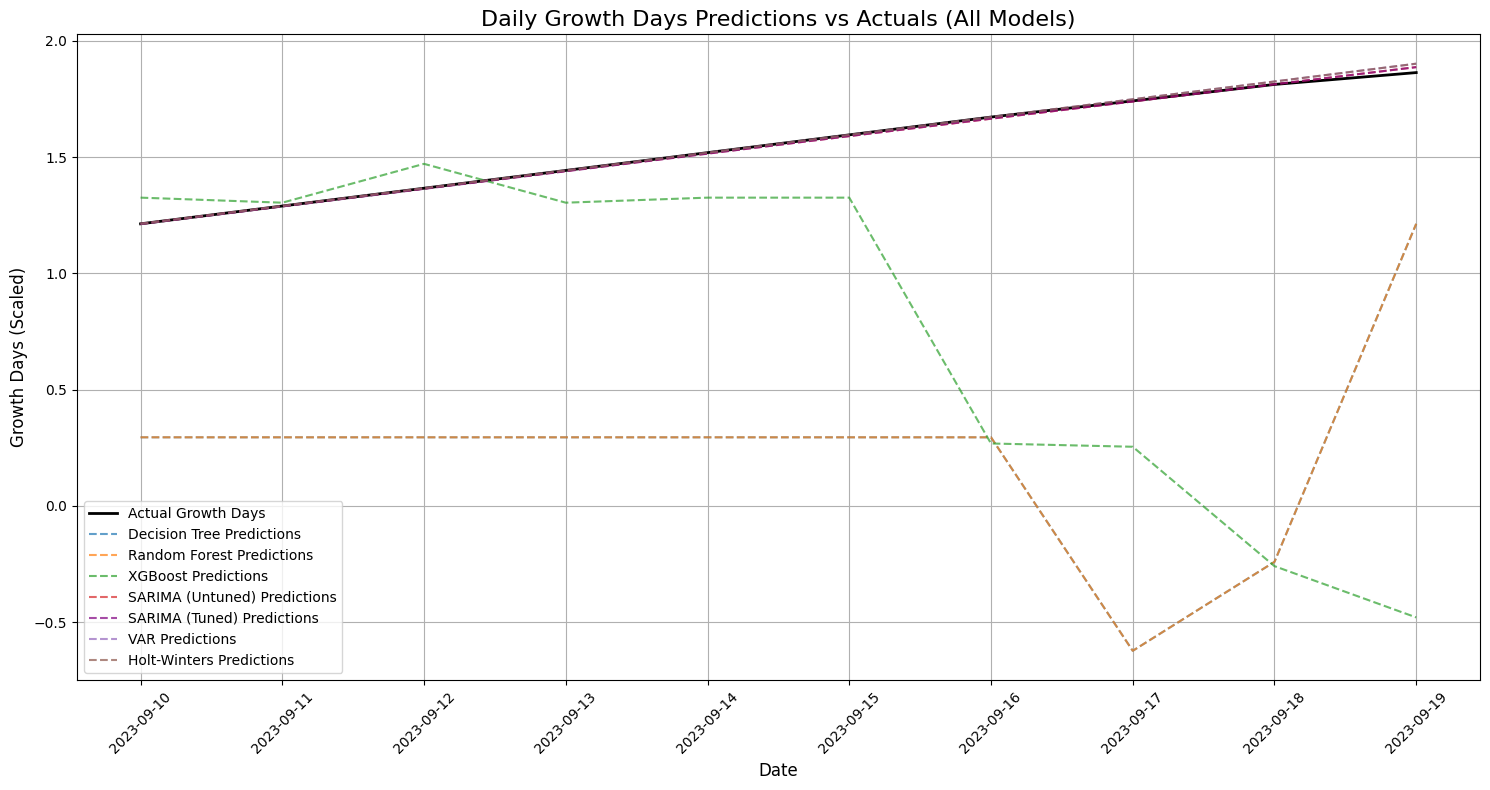

Visualized all model predictions against actual daily data, including tuned SARIMA.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure X_test_sarimax_agg is used for consistency with SARIMA, VAR, Holt-Winters
# X_test_sarimax_agg represents the exogenous variables for the test period from the aggregated daily data.

# 2. Use the trained dt_model to predict on X_test_sarimax_agg
dt_predictions_agg = dt_model.predict(X_test_sarimax_agg)

# 3. Use the trained rf_model to predict on X_test_sarimax_agg
rf_predictions_agg = rf_model.predict(X_test_sarimax_agg)

# 4. Use the trained xgb_model to predict on X_test_sarimax_agg
xgb_predictions_agg = xgb_model.predict(X_test_sarimax_agg)

# 5. Convert dt_predictions_agg, rf_predictions_agg, and xgb_predictions_agg into pandas Series,
# aligning their indices with y_test_sarimax_agg.index
dt_predictions_series = pd.Series(dt_predictions_agg, index=y_test_sarimax_agg.index, name='Decision Tree Predictions')
rf_predictions_series = pd.Series(rf_predictions_agg, index=y_test_sarimax_agg.index, name='Random Forest Predictions')
xgb_predictions_series = pd.Series(xgb_predictions_agg, index=y_test_sarimax_agg.index, name='XGBoost Predictions')

# 6. Create a figure with a suitable size
plt.figure(figsize=(15, 8))

# 7. Plot the actual Growth Days from y_test_sarimax_agg
plt.plot(y_test_sarimax_agg.index, y_test_sarimax_agg, label='Actual Growth Days', color='black', linewidth=2)

# 8. Plot the predictions from each model
plt.plot(dt_predictions_series.index, dt_predictions_series, label='Decision Tree Predictions', linestyle='--', alpha=0.7)
plt.plot(rf_predictions_series.index, rf_predictions_series, label='Random Forest Predictions', linestyle='--', alpha=0.7)
plt.plot(xgb_predictions_series.index, xgb_predictions_series, label='XGBoost Predictions', linestyle='--', alpha=0.7)
plt.plot(predictions_mean_agg.index, predictions_mean_agg, label='SARIMA (Untuned) Predictions', linestyle='--', alpha=0.7) # Label for untuned SARIMA
plt.plot(predictions_mean_tuned.index, predictions_mean_tuned, label='SARIMA (Tuned) Predictions', linestyle='--', alpha=0.7, color='purple') # Added tuned SARIMA
plt.plot(var_predictions_series.index, var_predictions_series, label='VAR Predictions', linestyle='--', alpha=0.7)
plt.plot(holt_predictions.index, holt_predictions, label='Holt-Winters Predictions', linestyle='--', alpha=0.7)

# 9. Add a title to the plot
plt.title('Daily Growth Days Predictions vs Actuals (All Models)', fontsize=16)

# 10. Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth Days (Scaled)', fontsize=12)

# 11. Include a legend
plt.legend()

# 12. Add a grid to the plot
plt.grid(True)

# 13. Rotate the x-axis labels
plt.xticks(rotation=45)

# 14. Ensure all elements fit within the figure
plt.tight_layout()

# 15. Display the plot
plt.show()

print("Visualized all model predictions against actual daily data, including tuned SARIMA.")

## SAVING SARIMA MODEL AS PKL

In [ ]:
import pickle

# Save the best SARIMA model to a pickle file
with open('best_sarima_model.pkl', 'wb') as pkl_file:
    pickle.dump(best_sarima_results, pkl_file)

print("Best SARIMA model saved to 'best_sarima_model.pkl'.")

Best SARIMA model saved to 'best_sarima_model.pkl'.
